**TP : Construction et Entraînement d'un Réseau de Neurones Artificiel (ANN)**

**Objectifs**



1.   Comprendre le fonctionnement des réseaux de neurones artificiels.
2.    Implémenter un réseau de neurones à plusieurs couches (MLP - Multilayer Perceptron) à partir de zéro avec NumPy.
3.   Utiliser Keras pour construire un ANN, et l'entraîner sur le jeu de données MNIST.

  

**Étape 1 : Comprendre les Perceptrons**



1.   Commencez par implémenter un perceptron simple en utilisant NumPy.
2.      Objectif : Comprendre comment une seule couche linéaire avec une fonction d'activation peut faire des prédictions.



    


In [25]:
import numpy as np
import random
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

# Générer des données fictives
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Entrées
y = np.array([0, 1, 1, 0])  # Étiquettes (XOR)
# Initialiser les poids et biais
#Votre code
input_size = X.shape[1]
output_size = 1
weights = np.random.rand(input_size)
bias = np.random.rand(1)

In [8]:
# Fonction d'activation (sigmoïde)
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

In [9]:
# Fonction de prédiction
def prediction(x, w, b):
    return np.dot(x, w) + b

In [23]:
# Prédire pour chaque entrée
for i in range(len(X)):
    pred = sigmoide(prediction(X[i], weights, bias))
    print(f"{i}ème prédiction: {pred}, valeur réelle: {y[i]}")

0ème prédiction: [0.50544769], valeur réelle: 0
1ème prédiction: [0.55816549], valeur réelle: 1
2ème prédiction: [0.69017716], valeur réelle: 1
3ème prédiction: [0.73358264], valeur réelle: 0


**Étape 2 : Propagation Avant d'un ANN avec NumPy**


1.       Implémentez un réseau de neurones artificiel à 2 couches pour classifier des données.
2.    Objectif : Étendre le perceptron simple en un réseau à plusieurs couches.




   

In [24]:
#CODE ICI
input_size = X.shape[1]
output_size = 1
weights_neurone_2 = np.random.rand(1)
bias_neurone_2 = np.random.rand(1)
# Prédire pour chaque entrée
for i in range(len(X)):
    pred_neurone1 = sigmoide(prediction(X[i], weights, bias))
    pred_neurone2 = sigmoide(prediction(pred_neurone1, weights_neurone_2, bias_neurone_2))
    print(f"{i}ème prédiction: {pred_neurone2}, valeur réelle: {y[i]}")


0ème prédiction: [0.74381613], valeur réelle: 0
1ème prédiction: [0.7473322], valeur réelle: 1
2ème prédiction: [0.75599574], valeur réelle: 1
3ème prédiction: [0.75879997], valeur réelle: 0


**Étape 3 : Construire un ANN avec Keras**

1. Utilisez Keras pour créer un réseau de neurones à plusieurs couches (MLP) et l'entraîner sur le jeu de données MNIST (chiffres manuscrits).

In [22]:
#Code ICI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
MLP_classifier = Sequential()
MLP_classifier.add(Flatten(input_shape=(28, 28))) 
MLP_classifier.add(Dense(10, activation='relu'))  
MLP_classifier.add(Dense(20, activation='relu'))
MLP_classifier.add(Dense(10, activation='softmax'))

MNIST = mnist

MLP_classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Étape 4 : Évaluation et Visualisation des Prédictions**

1. Évaluer le modèle entraîné sur le jeu de données de test.
2. Visualisez les prédictions sur quelques exemples.

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4902 - accuracy: 0.8547
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2707 - accuracy: 0.9215
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2382 - accuracy: 0.9307
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2202 - accuracy: 0.9355
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2084 - accuracy: 0.9382
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1987 - accuracy: 0.9417
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1908 - accuracy: 0.9433
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1848 - accuracy: 0.9462
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1806 - accuracy: 0.9471
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.1834 

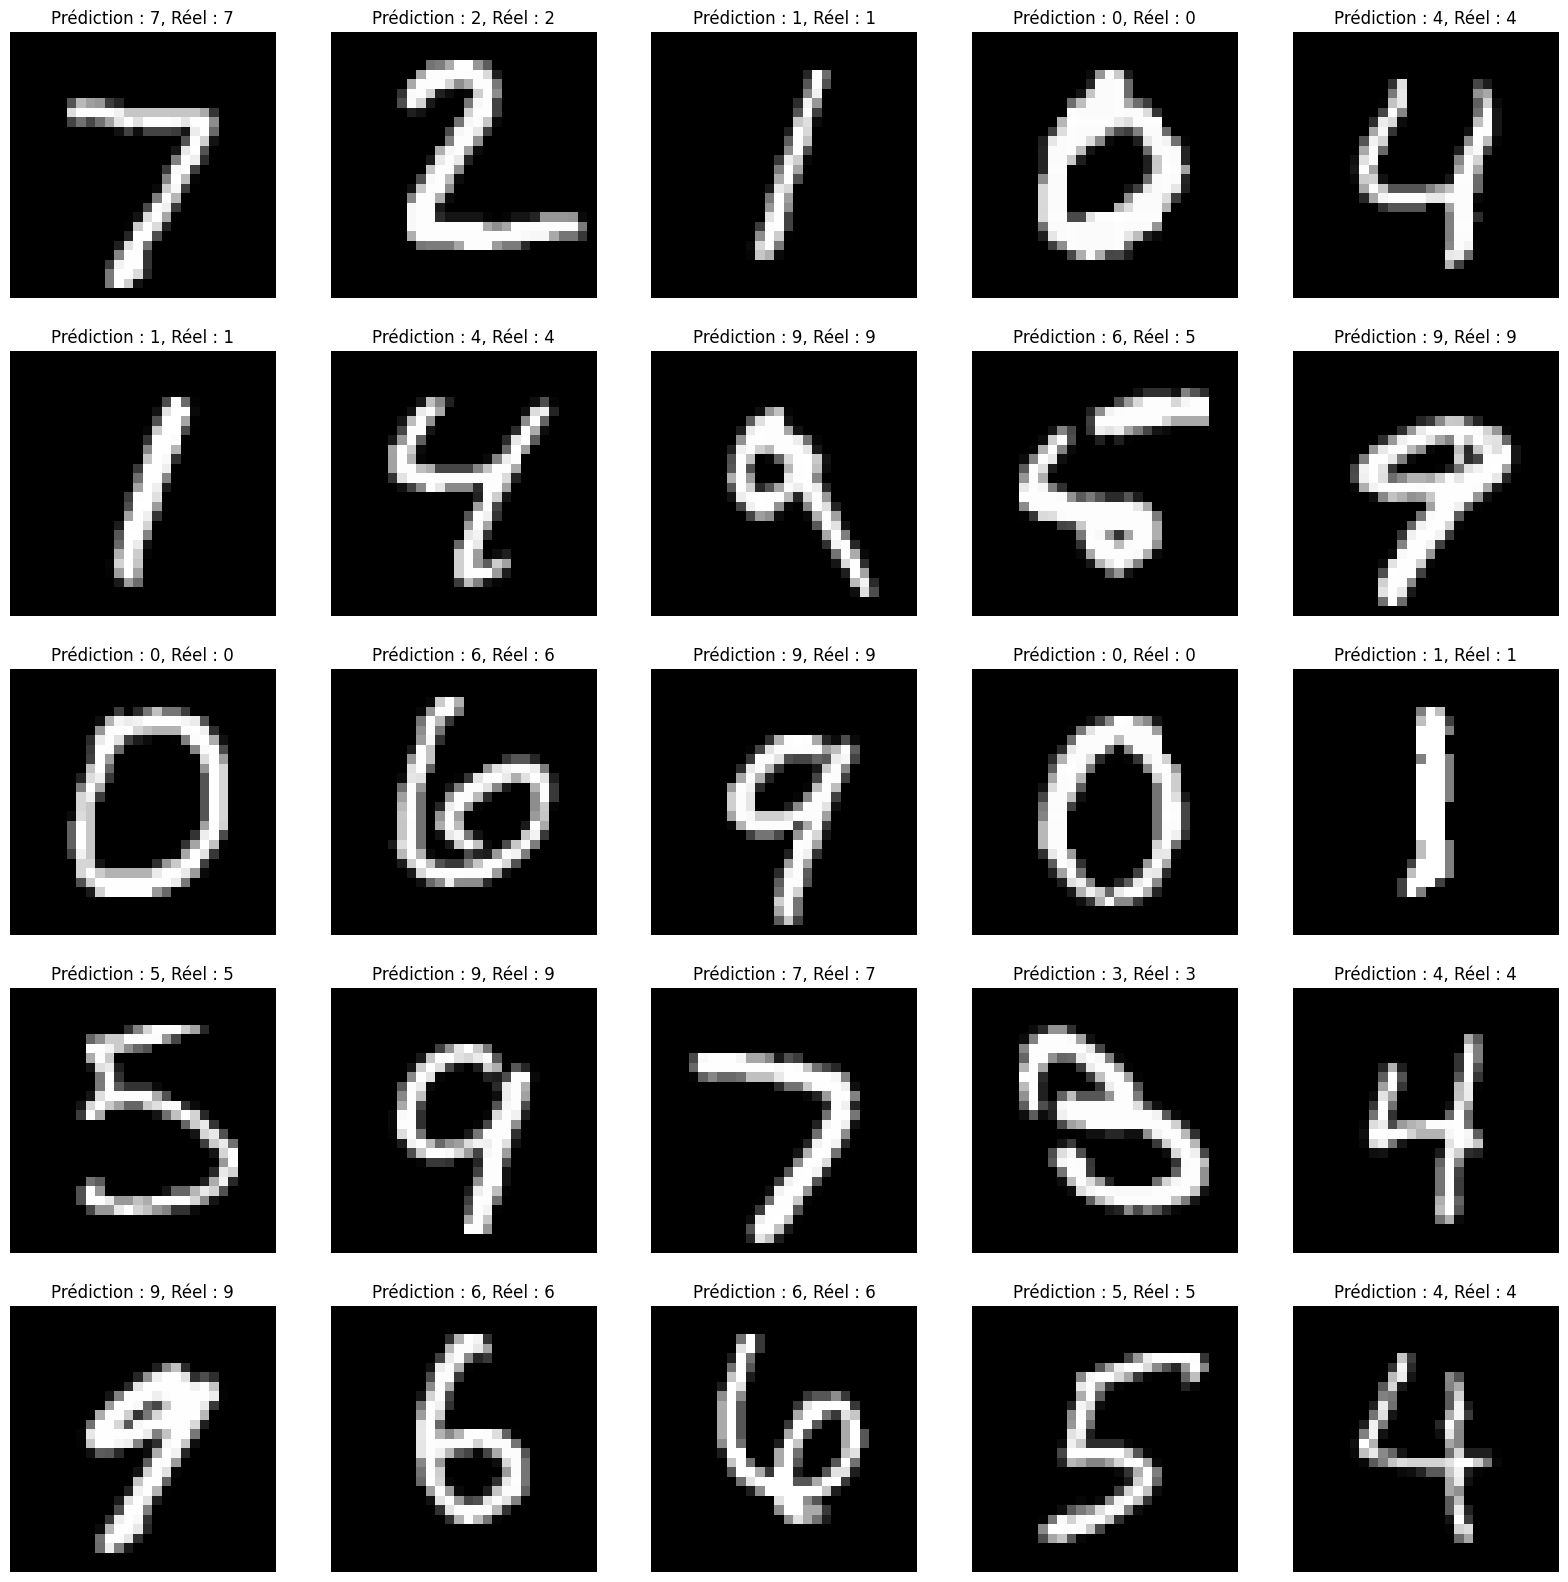

In [23]:
#CODE ICI
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#X_train = X_train.reshape(X_train.shape[0], -1)
#X_test = X_test.reshape(X_test.shape[0], -1)

MLP_classifier.fit(X_train, y_train,epochs=10, batch_size=32)

test_loss, test_accuracy = MLP_classifier.evaluate(X_test, y_test)
print(f'Précision : {test_accuracy:.2f}')
print(f'Loss (categorical_crossentropy): {test_loss:.2f}')

# Étape 7 : Faire des prédictions
predictions = MLP_classifier.predict(X_test)

# Afficher quelques images avec les prédictions
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Prédiction : {np.argmax(predictions[i])}, Réel : {np.argmax(y_test[i])}')
    plt.axis('off')
plt.show()

**Étape 5 : Analyse des Résultats**

1. Analysez les résultats et commentez les erreurs que le modèle pourrait faire.
2. Testez différentes fonctions d'activation (par exemple, tanh, sigmoid au lieu de relu) et voyez comment cela affecte la performance du modèle.


5.Le modèle a une précision de 94% pour sigmoid ce qui indique qu'il généralise bien les données. La loss de l'ensemble de test est de 0.22 ce qui indique que le modèle est performant.Le modèle a une précision de 95% pour relu ce qui indique qu'il généralise bien les données. La loss de l'ensemble de test est de 0.18 ce qui indique que le modèle est plus performant. Connaissant la simplicité de la fonction d'activation en terme de calcul, cela montre que le choix de la fonction d'activation n'est pas forcément critique pour le modèle.


**Étape 6 : Ajustement des Hyperparamètres**

1. Essayez de modifier le nombre de neurones dans les couches cachées.
2. Changez le taux d'apprentissage ou utilisez un autre optimiseur comme SGD et comparez les résultats.

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8408 - accuracy: 0.7225
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4728 - accuracy: 0.8538
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4198 - accuracy: 0.8732
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3911 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3708 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3545 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3438 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.9024
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3289 - accuracy: 0.9043
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3393 

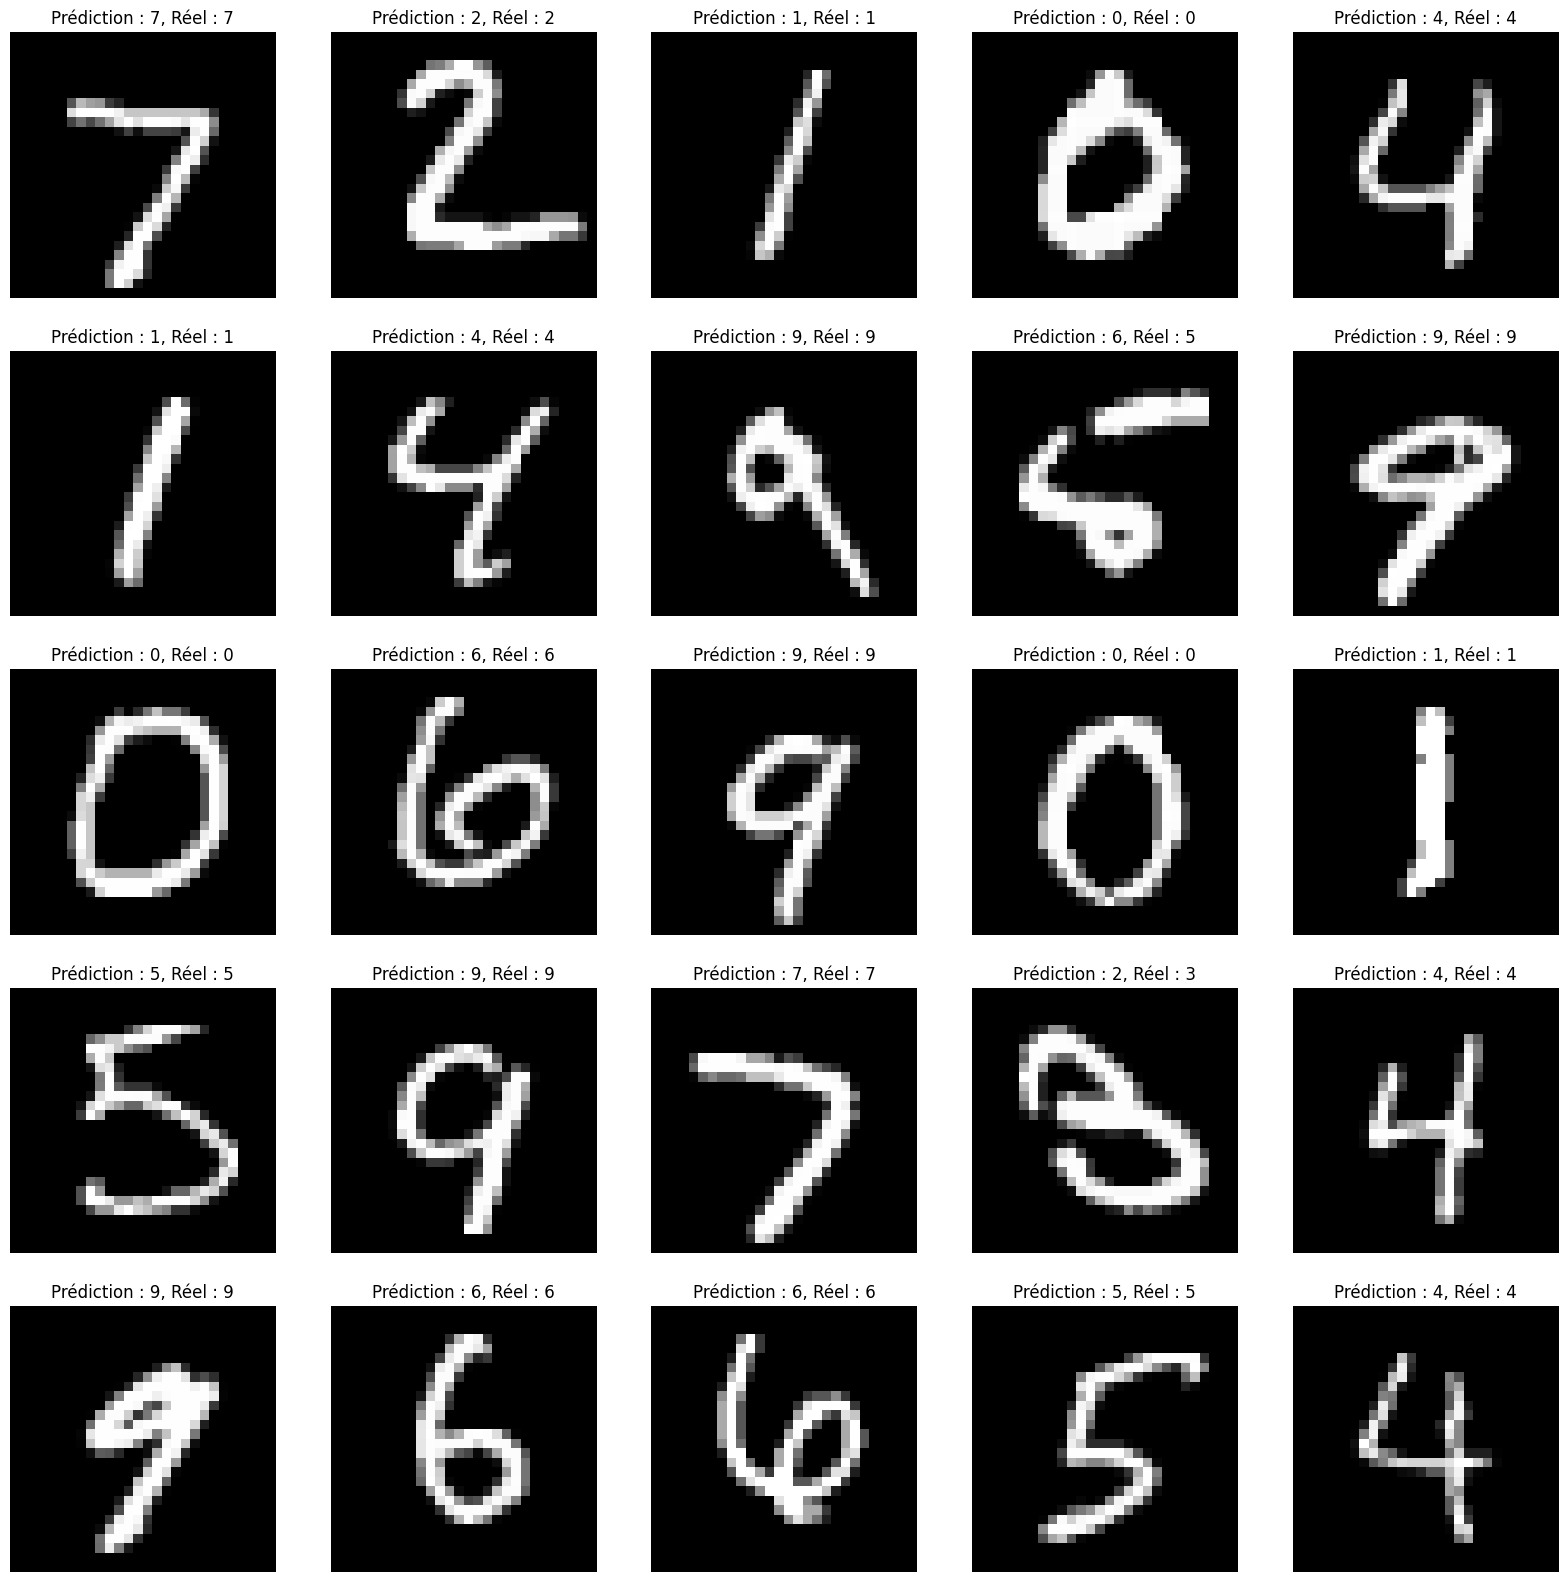

In [24]:
MLP_classifier = Sequential()
MLP_classifier.add(Flatten(input_shape=(28, 28))) 
MLP_classifier.add(Dense(5, activation='relu'))#MODIFICATION DU NOMBRE DE NEURONES
MLP_classifier.add(Dense(10, activation='relu'))#MODIFICATION DU NOMBRE DE NEURONES
MLP_classifier.add(Dense(10, activation='softmax'))

MNIST = mnist

MLP_classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#X_train = X_train.reshape(X_train.shape[0], -1)
#X_test = X_test.reshape(X_test.shape[0], -1)

MLP_classifier.fit(X_train, y_train,epochs=10, batch_size=32)

test_loss, test_accuracy = MLP_classifier.evaluate(X_test, y_test)
print(f'Précision : {test_accuracy:.2f}')
print(f'Loss (categorical_crossentropy): {test_loss:.2f}')

# Étape 7 : Faire des prédictions
predictions = MLP_classifier.predict(X_test)

# Afficher quelques images avec les prédictions
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Prédiction : {np.argmax(predictions[i])}, Réel : {np.argmax(y_test[i])}')
    plt.axis('off')
plt.show()

6.Le modèle a une précision de 90% pour sigmoid ce qui indique qu'il généralise bien les données. La loss de l'ensemble de test est de 0.34 ce qui indique que le modèle est beaucoup moins performant que les deux précédents car l'erreur passe de 6 et 5% respectivement à 10%.

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0589 - accuracy: 0.6665
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3990 - accuracy: 0.8867
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.9029
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3066 - accuracy: 0.9126
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2884 - accuracy: 0.9173
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2758 - accuracy: 0.9218
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9243
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2581 - accuracy: 0.9264
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2507 - accuracy: 0.9289
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2396 

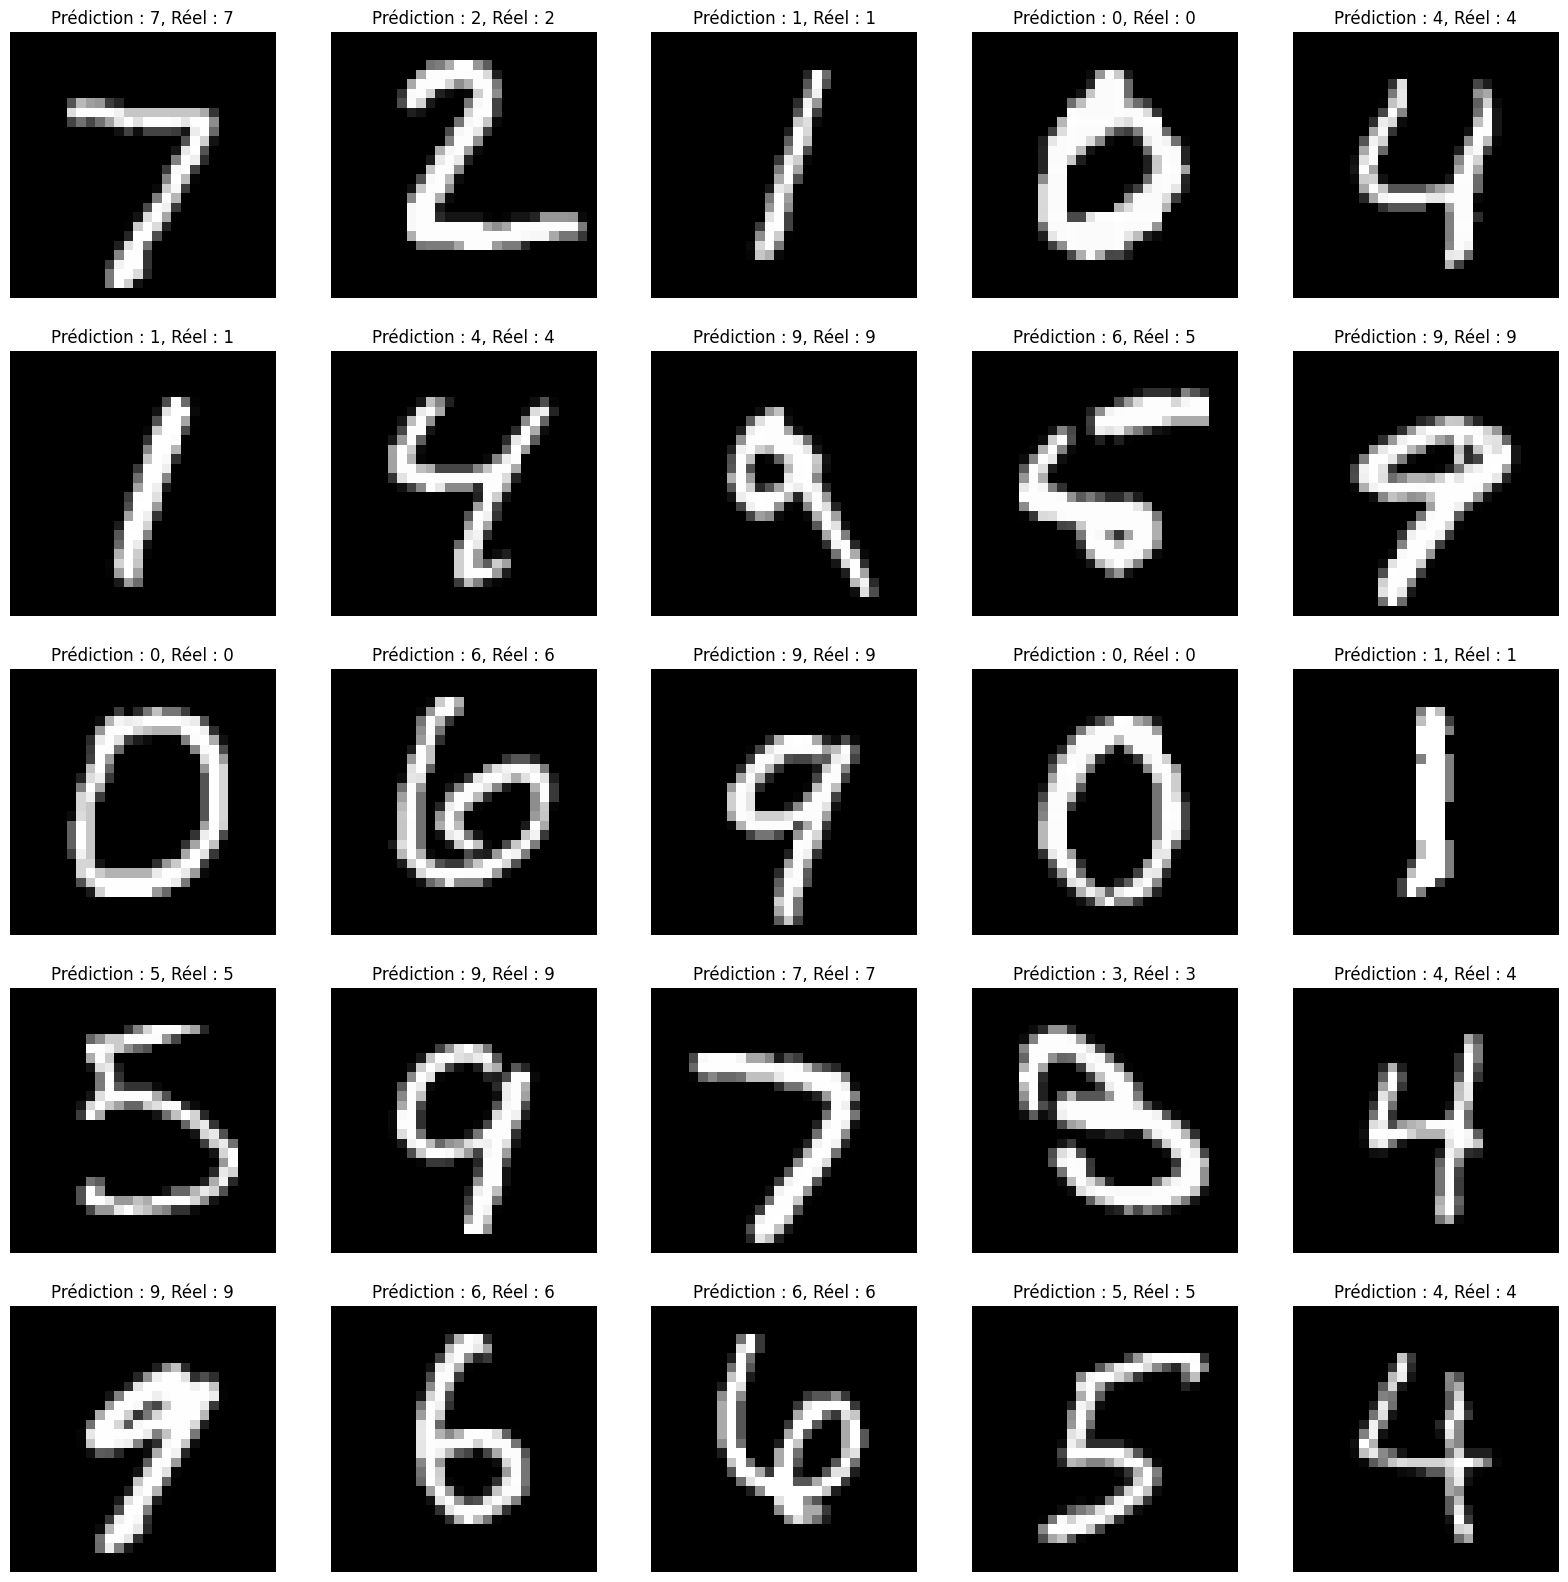

In [26]:
MLP_classifier = Sequential()
MLP_classifier.add(Flatten(input_shape=(28, 28))) 
MLP_classifier.add(Dense(10, activation='relu'))  
MLP_classifier.add(Dense(20, activation='relu'))
MLP_classifier.add(Dense(10, activation='softmax'))

MNIST = mnist
optimizer=SGD(learning_rate=0.01)#MODIFICATION DE LA METHODE D'OPTIMISATION
MLP_classifier.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#X_train = X_train.reshape(X_train.shape[0], -1)
#X_test = X_test.reshape(X_test.shape[0], -1)

MLP_classifier.fit(X_train, y_train,epochs=10, batch_size=32)

test_loss, test_accuracy = MLP_classifier.evaluate(X_test, y_test)
print(f'Précision : {test_accuracy:.2f}')
print(f'Loss (categorical_crossentropy): {test_loss:.2f}')

# Étape 7 : Faire des prédictions
predictions = MLP_classifier.predict(X_test)

# Afficher quelques images avec les prédictions
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Prédiction : {np.argmax(predictions[i])}, Réel : {np.argmax(y_test[i])}')
    plt.axis('off')
plt.show()

6.2 Le modèle a une précision de 93% pour relu ce qui indique qu'il généralise bien les données. La loss de l'ensemble de test est de 0.24 ce qui indique que le modèle est moins performant que le modèle relu adam qui avait une précision de 95%. On en conclut que SGD est moins performant que Adam ou que SGD converge moins vite ou les deux.